In [1]:
!pip install opencv-python

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def show_img(image, title="image"):
    plt.imshow(image, cmap="gray")
    plt.title(title)
    plt.axis('off')
    plt.show()

In [4]:
circle_gaussian = "/Users/yuna/Homework/HW3 Image Samples/Noise Filtering/Fig0504(a)(gaussian-noise).jpg"
circle_saltpepper = "/Users/yuna/Homework/HW3 Image Samples/Noise Filtering/Fig0504(i)(salt-pepper-noise).jpg"
lenna_gaussian = "/Users/yuna/Homework/HW3 Image Samples/Noise Filtering/Gaussian noise.png"
lenna_saltpepper = "/Users/yuna/Homework/HW3 Image Samples/Noise Filtering/Salt&pepper noise.png"
lenna_noise = "/Users/yuna/Homework/HW3 Image Samples/Noise Filtering/Lena_noise.png"

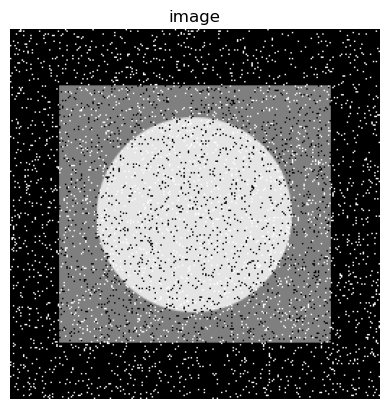

In [17]:
src = cv2.imread(circle_saltpepper, 0)

h, w = src.shape

show_img(src)

In [6]:
def median_filtering(image, h, w, k):
    new = np.zeros((h,w), dtype=np.uint8)
    d = k//2
    
    mask = [[0 for col in range(k)] for row in range(k)]
    
    for i in range(1, h-d):
        for j in range(1, w-d):
            for x in range(k):
                for y in range(k):
                    mask[x][y] = image[i+(x-d)][j+(y-d)]
            new_mask = np.sort(mask, axis=None)
            new[i][j] = new_mask[k*k//2]
            
    return new


def gaussian_filtering(image, h, w, k, s):
    new = np.zeros((h,w), dtype=np.uint8)
    d = k//2
    sum_ = 0
    
    # 마스크 생성
    mask = [[0 for col in range(k)] for row in range(k)]
    for x in range(-d, d+1):
        for y in range(-d, d+1):
            r = (x**2 + y**2) / (2*s*s)
            mask[x+d][y+d] = (1/(2*np.pi*s)) * np.exp(-r)
            sum_ += mask[x+d][y+d]
    
    for i in range(d, h-d):
        for j in range(d, w-d):
            nor_sum = 0
            for x in range(-d, d+1):
                for y in range(-d, d+1):
                    nor_sum += image[i+x][j+y] * mask[x+d][y+d]
            nor_sum = nor_sum / sum_
            new[i][j] = nor_sum
            
            
    return new

In [18]:
new = gaussian_filtering(src, h, w, 3, 0.1)

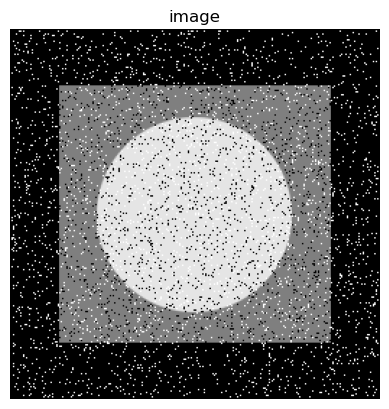

In [19]:
show_img(new)

In [20]:
cv2.imwrite("/Users/yuna/Homework/HW3 Image Samples/Noise Filtering/Fig0504(i) gaussian-filtering 3by3 s=01.jpg", new)

True